

# <center>**Simple Linear Regression Task**</center>


# <center><font color=1C5192>GRIP - The Sparks Foundation</font></center>

![title](logo.png)

## <center><font color=33AACE>Author:  Saman Siddiqui </font></center>

## <center> Simple linear regression </center>
### <center>A regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.</center>

## Dependent Variable :
### <font color="blue"> Dependent variable is the variable whose values we want to predict or forecast.</font>

### <font color="orange"> Its values depend on other variable.</font>

### <font color="green"> It is denoted by y </font>


## Independent Variable :

### <font color="blue"> This is the variable that explains the other one..</font>

### <font color="orange"> Its values are independent..</font>

### <font color="green"> It is denoted by X </font>




## Reminder : 
### Linear equation : y = mx + c

###  <font color="red"> Do you remember that ?</font>

## So here what we are gonna do is find independent variable (which is Y) using dependent variable (that is X) 

![title](l3.jpg)

![title](l2.jpg)

![title](l1.jpg)

![title](l4.jpg)

![title](l5.jpg)

# Main Goals :

## - Use least squares to fit a line to the data.
## - Calculate R-square
## - Calculate p-value for R-square

### 1. Importing the libraries

In [2]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Reading the data

In [3]:
# Reading data from student_scores.csv file
url = "..//dataset/student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)
# head function in Pandas, by default, shows you the top 5 rows of data in the DataFrame.

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Shape of Dataframe
s_data.shape

(25, 2)

In [7]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3. EDA

### checking if it is a linear regression :

[]

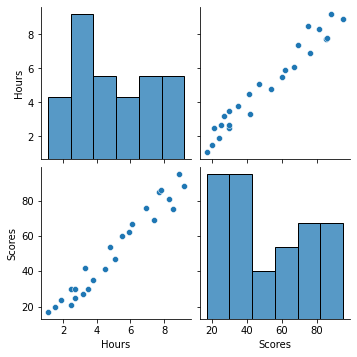

In [8]:
sns.pairplot(s_data)
plt.plot()

C:\Users\Samsid\anaconda3\envs\EnvAll\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


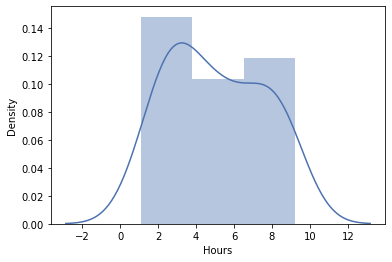

In [9]:
sns.set_color_codes()
ax = sns.distplot(s_data['Hours'], color="b")

C:\Users\Samsid\anaconda3\envs\EnvAll\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


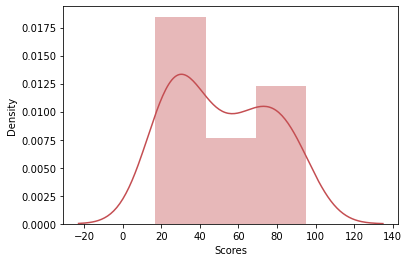

In [10]:
sns.set_color_codes()
ax = sns.distplot(s_data['Scores'], color="r")

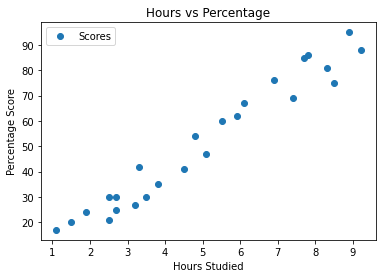

In [11]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


## Performing Simple Linear Regression
### Equation of simple linear regression y = c + mX In our case: y = c + m * Scores 
### The m values are known as model coefficients or model parameters. We’ll perform simple linear regression in four steps.

#### Create X and y
#### Create Train and Test set
#### Train your model
#### Evaluate the model
#### Create X and y
#### First, we’ll assign independent variable 'Hours' as X and  dependent variable that is target variable 'Scores' as y. 

###  5. Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

###  6. Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [15]:
print('Training Score: ', round(regressor.score(X_train,y_train)*100,2),'%')
print('Testing Score: ', round(regressor.score(X_test,y_test)*100,2),'%')

Training Score:  95.16 %
Testing Score:  94.55 %


### 7. Plotting the regression line

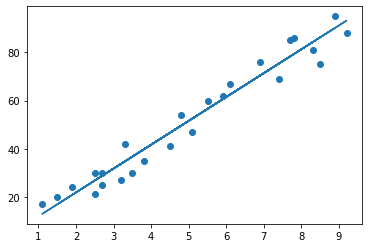

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

##### Plotting the regression line on test data


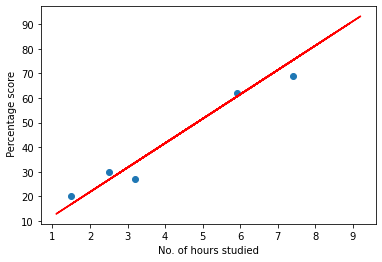

In [17]:
line= regressor.coef_*X+regressor.intercept_
plt.scatter(X_test,y_test)
plt.plot(X,line, c='red');
plt.xlabel("No. of hours studied")
plt.ylabel(" Percentage score")
plt.show()

### 8. Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
s_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
s_data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 9. Model Accuracy Score


In [20]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  94.55 %


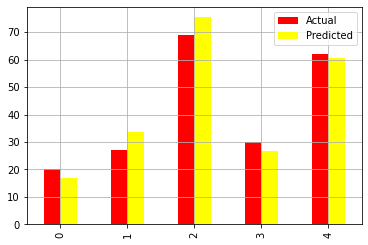

In [21]:
s_data.plot(kind='bar',color=['red','yellow'])
plt.grid()

### 10. Model Evaluation

In [22]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_pred))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
Explained Variance Score: 0.9482829156738147


### 12. Creating a Score_Prediction Function

In [23]:
def predict_score(x):
    x=float(x)
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    new_pred = regressor.predict(test)
    print('\n')
    print("No of Hours = {}".format(hours))
    print("Predicted Score = {}".format(round(new_pred[0]),2))

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### 12. Making a prediction

In [25]:
predict_score(9.25)



No of Hours = 9.25
Predicted Score = 94


### 13. Model Saving

In [26]:
import joblib
pred_score_model = open("../models/predict_score_model.pkl","wb")
joblib.dump(regressor, pred_score_model)
pred_score_model.close()

### 14. Conclusion
### I have successfully completed Prediction using Supervised ML algorithm and was able to evaluate the model's performance based on various parameters. 
### Model has got 94.55 % accuracy, which means model has trained very well in another words its a good fit model.

# <center> <font color="Blue"> Thank You !!! </center> </font>